In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

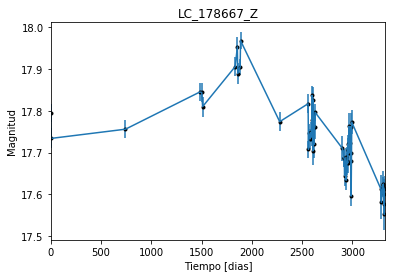

In [2]:
data = np.genfromtxt('LC_178667_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_178667_Z')
plt.savefig("LC_178667_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

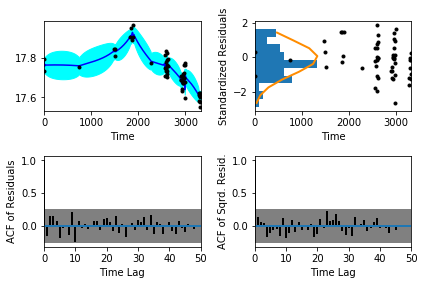

In [5]:
sample.assess_fit()

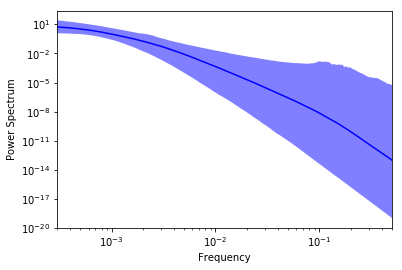

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

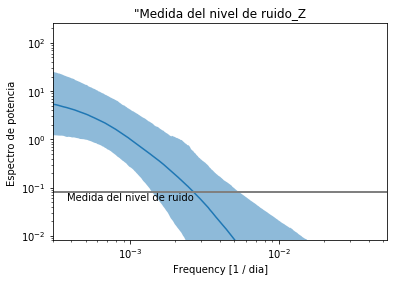

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_178667_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_178667_Z')

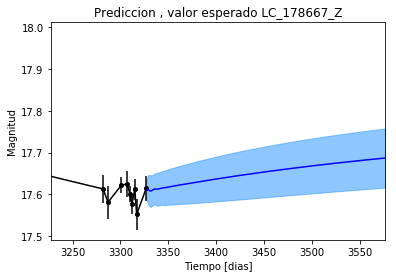

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_178667_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_178667_Z')

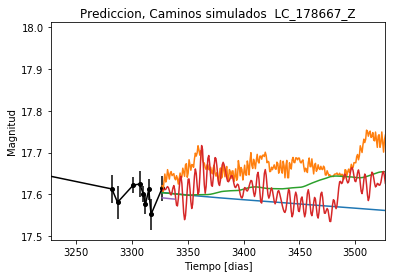

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_178667_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


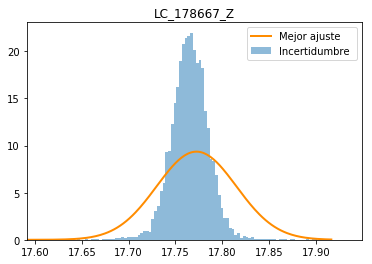

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_178667_Z')
plt.savefig("Mejor_ajuste_LC_178667_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_178667_Z')

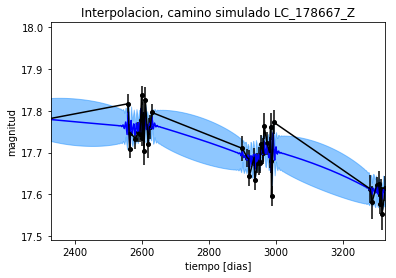

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_178667_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_178667_Z')

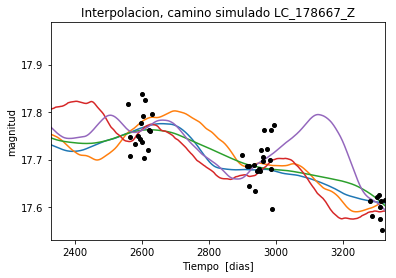

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_178667_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1481.96608152
Median: 0.00884644591949
Standard deviation: 0.182918361972
68% credibility interval: [ 0.00089632  0.15034673]
95% credibility interval: [  3.48483341e-04   7.45126873e-01]
99% credibility interval: [  3.11735628e-04   9.41452335e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 461.208653086
Median: 0.0013667181565
Standard deviation: 0.0607764551267
68% credibility interval: [ 0.00042329  0.0155225 ]
95% credibility interval: [ 0.00031661  0.15985904]
99% credibility interval: [  3.04104832e-04   4.25696559e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 212.208945906
Median: 0.0301206604428
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 391.979575418
Median: 110.468086319
Standard deviation: 1.62478207524
68% credibility interval: [ 108.87849276  111.4975859 ]
95% credibility interval: [ 106.58075042  113.4877478 ]
99% credibility interval: [ 104.48338549  114.97104218]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 536.256875589
Median: 0.791105233923
Standard deviation: 1.97909487626
68% credibility interval: [ 0.06752184  3.61115986]
95% credibility interval: [ 0.01345885  6.60616833]
99% credibility interval: [ 0.01001821  9.39378557]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 727.001335656
Median: 0.26156453166
Standard deviation: 7.36959512043
68% credibility interval: [ 0.01112901  5.12067601]
95% credibility interval: [  7.91754774e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20018.8514762
Median: 2.58657207761e-32
Standard deviation: 8.30738786817e+62
68% credibility interval: [  5.05453327e-69   1.16415505e-03]
95% credibility interval: [  2.28829819e-137   1.43149633e+011]
99% credibility interval: [  1.25492322e-158   2.09499529e+049]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2792.32651213
Median: 17.7576059684
Standard deviation: 0.0562383974716
68% credibility interval: [ 17.70791865  17.80313129]
95% credibility interval: [ 17.64184652  17.86286019]
99% credibility interval: [ 17.56845977  17.93318839]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 770.687708725
Median: 0.0018277268203
Standard deviation: 0.218450021228
68% credibility interval: [ 0.          0.25239493]
95% credibility interval: [ 0.          0.83191249]
99% credibility interval: [ 0.          0.97259964]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 770.687708725
Median: 0.0018277268203
Standard deviation: 0.218450021228
68% credibility interval: [ 0.          0.25239493]
95% credibility interval: [ 0.          0.83191249]
99% credibility interval: [ 0.          0.97259964]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 568.356491341
Median: 0.0
Standard deviation: 0.000320779123933
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 391.979575418
Median: 110.468086319
Standard deviation: 1.62478207524
68% credibility interval: [ 108.87849276  111.4975859 ]
95% credibility interval: [ 106.58075042  113.4877478 ]
99% credibility interval: [ 104.48338549  114.97104218]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1272.38702553
Median: 0.00985549778561
Standard deviation: 0.0122451398371
68% credibility interval: [ 0.00582583  0.01913702]
95% credibility interval: [ 0.00369872  0.04101719]
99% credibility interval: [ 0.00289406  0.08081397]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 976.616123534
Median: 1.59759428007
Standard deviation: 0.228951088448
68% credibility interval: [ 1.3660146   1.81673412]
95% credibility interval: [ 1.04630657  1.95529706]
99% credibility interval: [ 0.87104189  1.99032951]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 768.92083895
Median: 2.23847748917e-05
Standard deviation: 0.0807874693172
68% credibility interval: [  4.19357391e-07   2.85782574e-03]
95% credibility interval: [  3.96591904e-14   7.82993598e-02]
99% credibility interval: [  1.06555477e-51   6.65922115e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1481.96608152
Median: (-0.0555838590221-0.0285688833533j)
Standard deviation: 1.79020661893
68% credibility interval: [-0.94465637-0.96710287j -0.00563172-0.94539447j]
95% credibility interval: [ -4.68177022e+00+0.j          -2.18958541e-03-0.00103364j]
99% credibility interval: [ -5.91531948e+00+0.j          -1.95869272e-03-0.25406556j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 461.208653086
Median: (-0.00858734344001+0.010222420525j)
Standard deviation: 1.42469324238
68% credibility interval: [-0.09753076+1.03051257j -0.00265959+0.j        ]
95% credibility interval: [-1.00442396+1.86471668j -0.00198933+0.j        ]
99% credibility interval: [ -2.67473036e+00+2.65031811j  -1.91074701e-03+0.00951872j]
Posterior 